In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()
import seaborn as sns


In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()

for i in range(4):
    plt.matshow(digits.images[i])

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('E:\\pythonEverything\\COCOMO-81.csv')

In [4]:
cost_drivers = [
    'rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
    'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced'
]

df['EAF'] = df[cost_drivers].prod(axis=1)
df1=pd.get_dummies(df.dev_mode)
df2=pd.concat([df1,df],axis='columns')
df3=df2.drop(['dev_mode','num','rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
    'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced'],axis='columns')
df3.head(2)

,embedded,organic,semidetached,loc,actual,EAF
0,True,False,False,113.0,2040.0,2.288115
1,True,False,False,293.0,1600.0,0.842266


In [5]:
# X=df3.drop('actual',axis='columns')
# y=df3.actual
# y
le=['loc','EAF']
df3['effort']=df3[le].prod(axis=1)
# X=X.drop(['loc','EAF'],axis='columns')
# X.head()

#df4=df3.drop(['loc','EAF'],axis='columns')
df3

,embedded,organic,semidetached,loc,actual,EAF,effort
0,True,False,False,113.0,2040.0,2.288115,258.556994
1,True,False,False,293.0,1600.0,0.842266,246.784025
2,False,False,True,132.0,243.0,0.346245,45.704357
3,False,True,False,60.0,240.0,0.998141,59.888457
4,False,True,False,16.0,33.0,0.656169,10.498712
...,...,...,...,...,...,...,...
58,False,True,False,23.0,70.0,0.961608,22.116984
59,False,True,False,6.7,57.0,2.125489,14.240775
60,False,True,False,28.0,50.0,0.446599,12.504764
61,False,False,True,9.1,38.0,1.157497,10.533222


In [6]:
df3['logActual']=np.log1p(df3['actual'])
#df3['logEffort']=np.log1p(df3['effort'])
X=df3.drop(['actual','logActual'],axis='columns')
y=df3.logActual
X

,embedded,organic,semidetached,loc,EAF,effort
0,True,False,False,113.0,2.288115,258.556994
1,True,False,False,293.0,0.842266,246.784025
2,False,False,True,132.0,0.346245,45.704357
3,False,True,False,60.0,0.998141,59.888457
4,False,True,False,16.0,0.656169,10.498712
...,...,...,...,...,...,...
58,False,True,False,23.0,0.961608,22.116984
59,False,True,False,6.7,2.125489,14.240775
60,False,True,False,28.0,0.446599,12.504764
61,False,False,True,9.1,1.157497,10.533222


In [7]:
# sns.scatterplot(data=df3,x='logActual',y='logEffort',color='dodgerblue', s=70)
# plt.show()

In [7]:
y.head(4)

0    7.621195
1    7.378384
2    5.497168
3    5.484797
Name: logActual, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [10]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE  : " ,mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print(model.score(X_test,y_test))

R² Score: 0.9356103838236328
MAE  :  0.3577540892054013
RMSE: 0.4010019562605935
0.9356103838236328


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

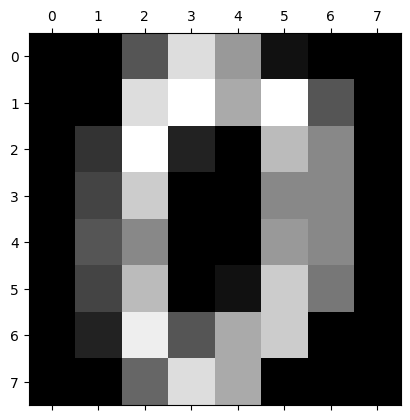

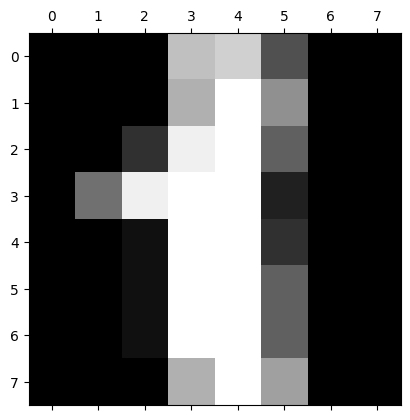

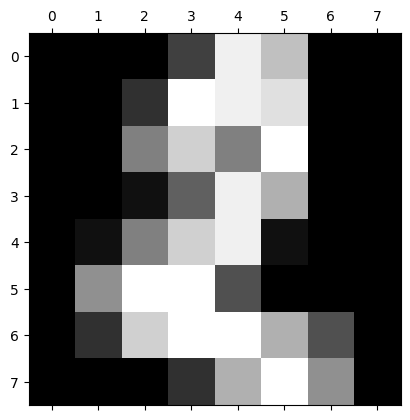

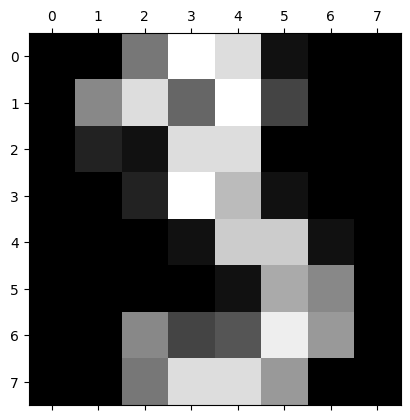

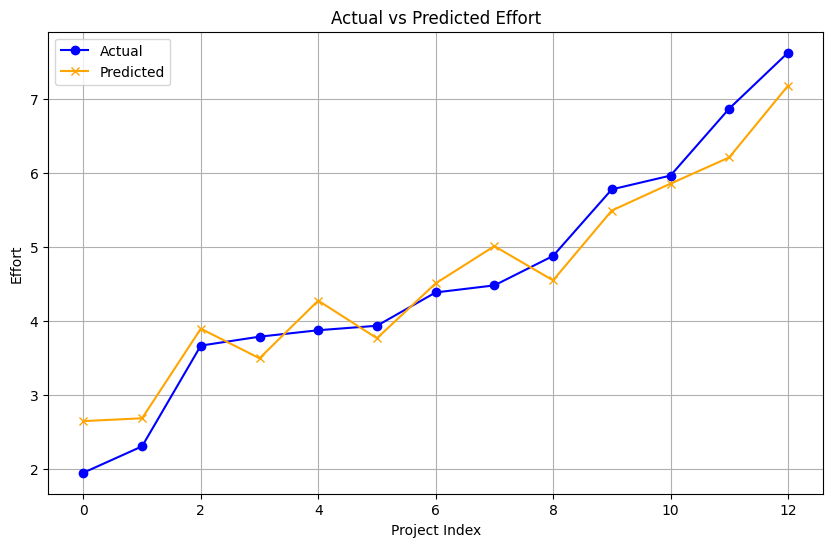

In [11]:
import matplotlib.pyplot as plt

# Optional: Sort values to make the line plot look cleaner
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison = comparison.sort_values(by='Actual').reset_index(drop=True)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue', marker='o')
plt.plot(comparison['Predicted'], label='Predicted', color='orange', marker='x')

plt.title('Actual vs Predicted Effort')
plt.xlabel('Project Index')
plt.ylabel('Effort')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#YE WALA KAAM BINA LOG KE KARNA

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='r2')
print("CV R² Mean:", scores.mean())


CV R² Mean: 0.8667483349218905


In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),X,y,cv=cv)

array([0.94338992, 0.90869824, 0.80585982, 0.80963696, 0.84089018])

In [14]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,X_test)
    return model.score(X_test,y_test)

In [15]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [187]:
# Core model
from sklearn.tree import DecisionTreeRegressor

# For splitting dataset into training and testing
from sklearn.model_selection import train_test_split

# For evaluating performance
from sklearn.metrics import root_mean_squared_error, r2_score


In [16]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred, squared=False))

NameError: name 'DecisionTreeRegressor' is not defined